# Heteroscedastic Gaussian Process Regression

## What Is Heteroscedastic GP Regression?

Typically when doing Gaussian process regression it is assumed that the data noise (or "likelihood" variance) is constant across the feature space. This is called homoscedasticity. Sometimes this is a valid assumption and typical Gaussian process modeling packages are sufficient. 

However, sometimes the data noise varies across the feature space. One example that is often used in introductory statistics classes is that of predicting food expenditure based on income. Wealthy individuals sometimes buy cheaper food product and sometimes buy very expensive food products. Less wealthy individuals don't tend to buy very expensive food products because they are limited by their income. This results in an increase in variance in the target variable along the predictor. This is called heteroscedasticity.

In this notebook we walk through a very simple example of fitting and using a heteroscedastic GP. For an example of fitting and using a homoscedastic GP see the regression example notebook.

## Example of 1D Heteroscedastic GP Regression

In [1]:
# model with Squidward
from squidward.kernels import distance, kernel_base
from squidward import gpr

# useful visualization functions
import gp_viz

# generate example data
import numpy as np

# plot example data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# generate noisy samples for dataset
samples = 100

# train data
x_train = np.random.uniform(0,15,samples)
noise = np.random.normal(0,250*x_train,samples)
y_train = 200 * x_train + noise

# test data
x_test = np.random.uniform(0,15,samples)
noise = np.random.normal(0,250*x_test,samples)
y_test = 200 * x_test + noise

# generate noiseless data to plot true mean
x_true = np.linspace(0,15,1000)
y_true = 200 * x_true

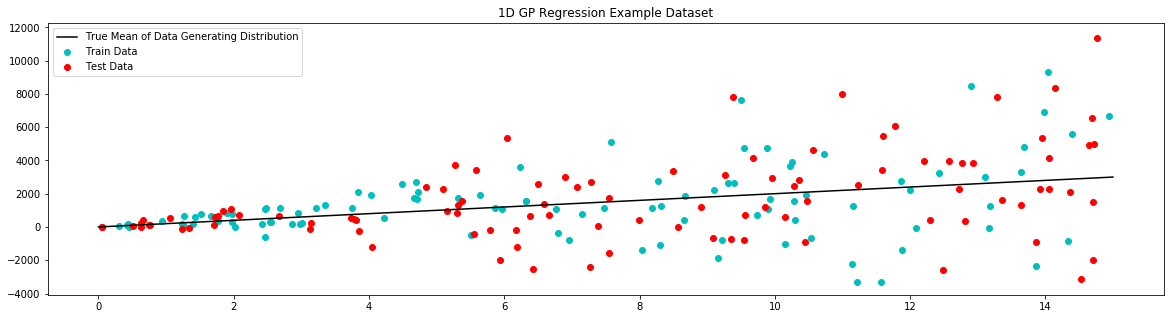

In [3]:
# plot example dataset
plt.figure(figsize=(20,5))
plt.title('1D GP Regression Example Dataset')
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.plot(x_true,y_true,label='True Mean of Data Generating Distribution', c='k')
plt.legend()
plt.show()

In [4]:
# first we define a model for our noise
# here we know the function exactly
# in practice this model would need to be learned/fit
def likelihood_variance_fucntion(x):
    return (250*x)**2

likelihood_variance = likelihood_variance_fucntion(x_train)

In [5]:
# define the distance function used by the kernel
d = distance.Linear(0.0, 1000**2, 1000**2)

In [6]:
# the kernel base class takes the distance measure of choice
kernel = kernel_base.Kernel(d, 'k1')

In [7]:
# the model is instantiated with the kernel
model = gpr.GaussianProcessInversion(kernel=kernel, var_l=likelihood_variance, inv_method='solve', show_warnings=False)

In [8]:
model.fit(x_train,y_train)

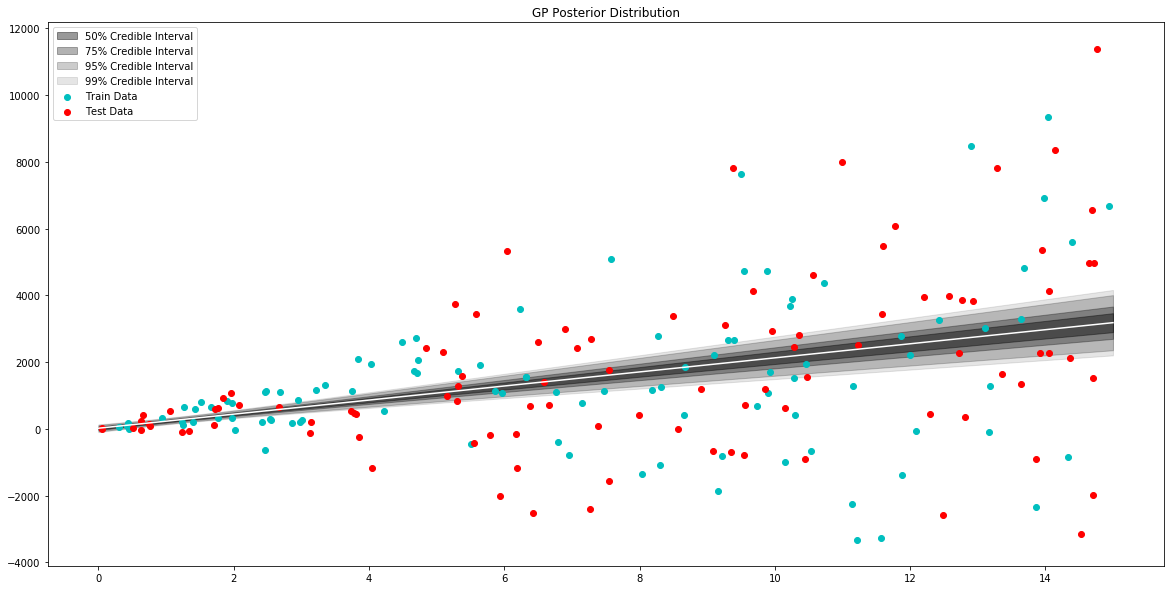

In [9]:
# generate data to plot posterior of model
x = np.linspace(0,15,100)

# pull the parameters of the posterior distribution
mean, var = model.posterior_predict(x)

# plot posterior of model
plt.figure(figsize=(20,10))
plt.title("GP Posterior Distribution")
gp_viz.regression.plot_1d(x,mean,var[:,0])
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()
plt.show()

One good test of fit for a GP model is comparing the posterior predictive to the actual data. Let's try that here.

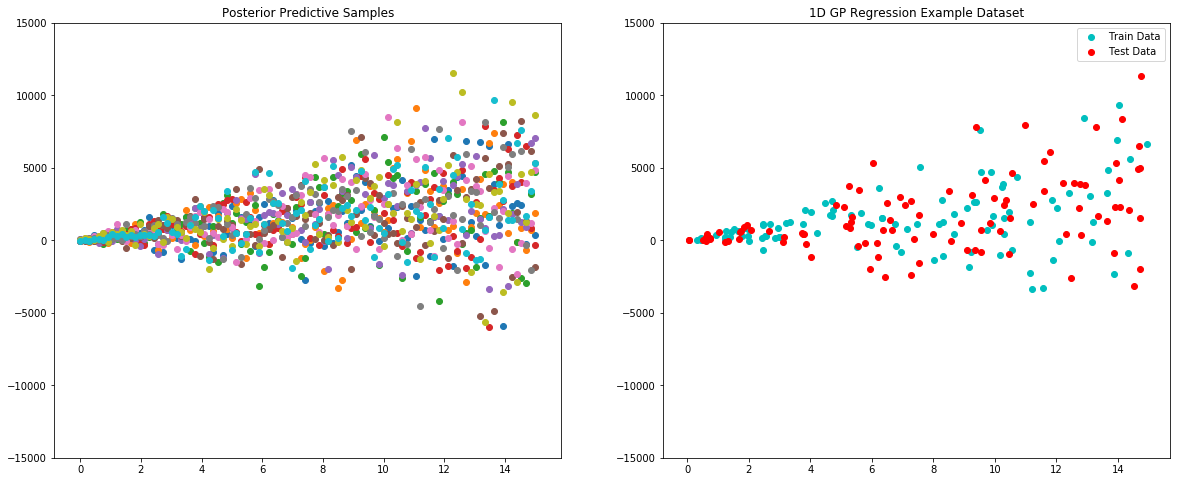

In [10]:
x = np.linspace(0, 15, 100)

plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.title("Posterior Predictive Samples")

for i in range(10):

    # draw a sample from the posterior
    posterior_sample = model.posterior_sample(x)

    # add likelihood noise 
    liklihood_noise = likelihood_variance_fucntion(x)
    liklihood_noise = np.diag(liklihood_noise)
    posterior_predictive_sample = np.random.multivariate_normal(mean=posterior_sample, cov=liklihood_noise, size=1)

    plt.scatter(x, posterior_predictive_sample)
    
plt.ylim(-15000, 15000)
        
plt.subplot(122)
plt.title('1D GP Regression Example Dataset')
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.ylim(-15000, 15000)
plt.legend()
        
plt.show()